<font size=48>Machine Learning</font><br>

## Lab08 - Logistic Regression

Objectives:
- Learn Logistic Regression

Version: 2024-12-23

This lab is by YP Wong [<yp@ypwong.net>](mailto:yp@ypwong.net).



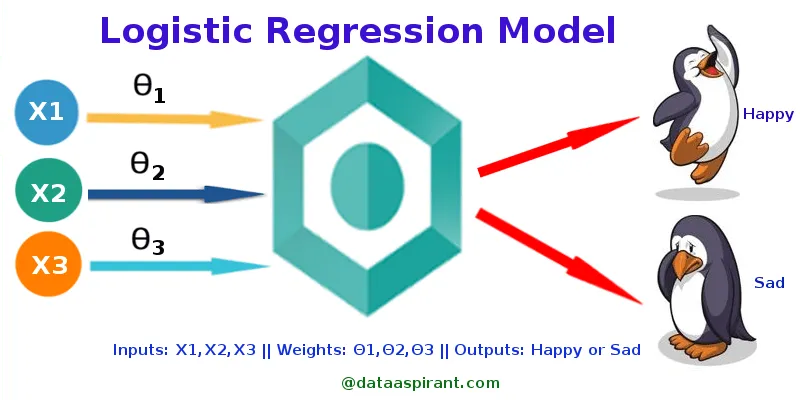

Source: https://dataaspirant.com/how-logistic-regression-model-works/

References:

- https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
- https://medium.com/analytics-vidhya/a-comprehensive-guide-to-logistic-regression-e0cf04fe738c

## <font color='lightblue'>Import Libraries</font>

In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline

## <font color='lightblue'>Logistic Regression</font>
Logistic regression is a supervised machine learning algorithm that is widely used for classification tasks. It predicts the probability that a given input belongs to one of two classes, often denoted as 0 and 1.
The model outputs <font color='lightblue'>**probabilities**</font>, which are values between 0 and 1, and uses the <font color='lightblue'>**logistic sigmoid function**</font> to map these probabilities from a <font color='lightblue'>**linear combination of the input features**</font>.






One could use the logistic regression model in the following scenarios:
*   Build an email classifier to tell us whether an incoming email should be marked as “spam” or “not spam”.
*   Check radiological images to predict whether a tumour is benign or malignant.
*   Pour through historic bank records to predict whether a customer will default on their loan repayments or repay the loan.


## <font color='lightblue'>The Logistic Sigmoid Function</font>
The sigmoid function is a function that produces an s-shaped curve. It is a key mathematical component of the logistic regression model. It takes any real value as an argument and maps it to a range between 0 and 1.


The sigmoid function is defined as the following:
$$\sigma(z) = \frac{1}{1+\frac{1}{e^z}} = \frac{1}{1+e^{-z}}$$

Where:

*   $\sigma(z)$ is the output of the sigmoid function, which represents the probability of the positive class.
*   $z$ is the input to the sigmoid function, which is typically the result of a linear combination of the input features in logistic regression.

## <font color='lightblue'> Visualization of Exponentials and the Sigmoid Function </font>

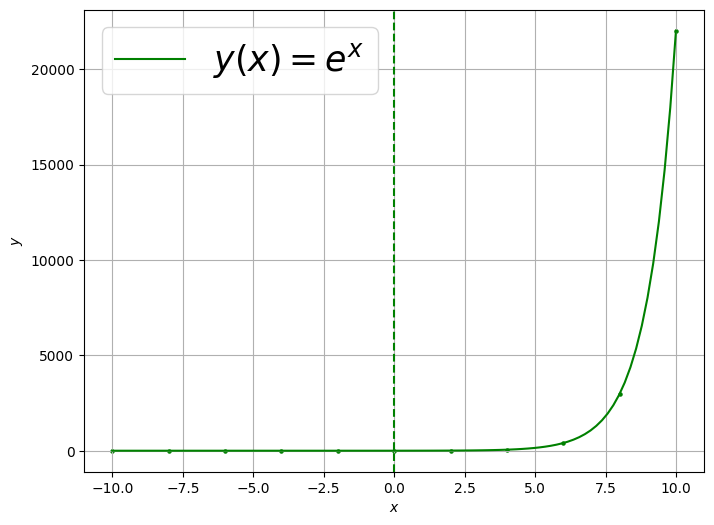

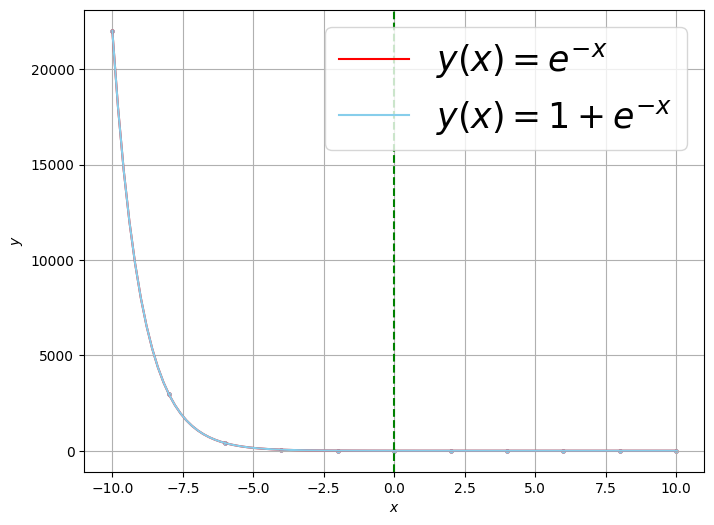

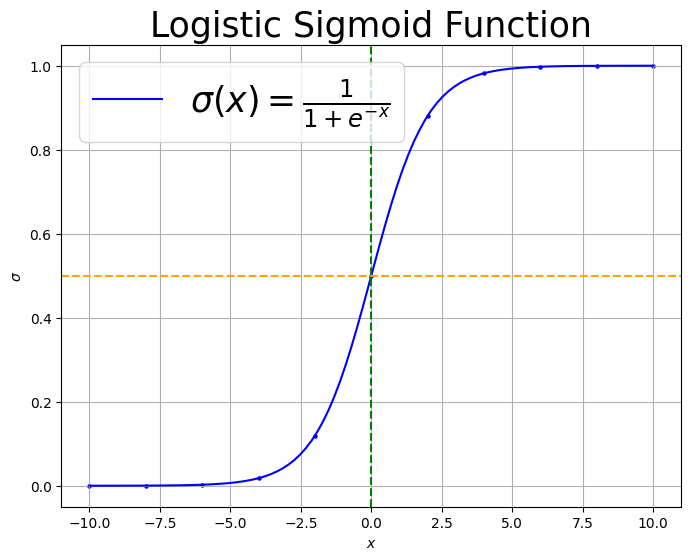


sigmoid(-10.000) = 0.0000454
sigmoid( -8.000) = 0.0003354
sigmoid( -6.000) = 0.0024726
sigmoid( -4.000) = 0.0179862
sigmoid( -2.000) = 0.1192029
sigmoid(  0.000) = 0.5000000
sigmoid(  2.000) = 0.8807971
sigmoid(  4.000) = 0.9820138
sigmoid(  6.000) = 0.9975274
sigmoid(  8.000) = 0.9996646
sigmoid( 10.000) = 0.9999546


In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

xlim_min, xlim_max = -10, 10

X     = np.linspace(xlim_min, xlim_max, 100)
X_pts = np.linspace(xlim_min, xlim_max, 11)

fig = plt.figure(figsize=(8, 6))
plt.plot   (X,     np.exp(X    ), color ="green", label = "$y(x) = e^{x}$")
plt.scatter(X_pts, np.exp(X_pts), color ="green", s = 5)
plt.axvline(x = 0, linestyle="dashed", color = "green")
plt.legend(loc = "best", fontsize = 25)
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.grid(True)
plt.show()
print()

fig = plt.figure(figsize=(8, 6))
plt.plot   (X,     np.exp(-X    ), color ="red", label = "$y(x) = e^{-x}$")
plt.scatter(X_pts, np.exp(-X_pts), color ="red", s = 5)
plt.plot    (X,    1 + np.exp(-X    ), color ="skyblue", label = "$y(x) = 1 + e^{-x}$")
plt.scatter(X_pts, 1 + np.exp(-X_pts), color ="skyblue", s = 5)
plt.axvline(x = 0, linestyle="dashed", color = "green")
plt.legend(loc = "best", fontsize = 25)
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.grid(True)
plt.show()
print()

fig = plt.figure(figsize=(8, 6))
plt.plot    (X,    1 / (1 + np.exp(-X    )), color ="blue", label = "$\sigma(x) = \\frac{1}{1 + e^{-x}}$")
plt.scatter(X_pts, 1 / (1 + np.exp(-X_pts)), color ="blue", s = 5)
plt.axvline(x = 0, linestyle="dashed", color = "green")
plt.axhline(y = 0.5, linestyle="dashed", color = "orange")
plt.legend(loc = "best", fontsize = 25)
plt.xlabel("$x$")
plt.ylabel("$\sigma$")
plt.title("Logistic Sigmoid Function", fontsize = 25)
plt.grid(True)
plt.show()
print()

for x in X_pts:
  print("sigmoid(%7.3f) = %.7f" % (x, 1 / (1 + np.exp(-x))))

## <font color='lightblue'>The Logistic Regression Model</font>

The logistic regression model uses the logistic sigmoid function to predict probabilities. It combines a linear model (similar to linear regression) with the sigmoid function to make predictions about the probability that an observation belongs to the positive class.




The **Logistic Regression Model**, which is the linear combination of the input feature variables can be represented as such:
$$z = \theta_0 + \theta_1 x_1 + \theta_2 x_2 + \ldots + \theta_n x_n$$

Where  $x_1, x_2, \ldots, x_n$ are the input feature variables, and $\theta_0, \theta_1, \theta_2, \ldots, \theta_n$ are the model coefficients (parameters).


Then, with the output of the model, $z$, we may calculate the probability of belonging to the positive class by using the logistic sigmoid function. The logistic sigmoid function maps the linear combination $z$ to a value between 0 and 1, representing a probability:
$$P(\text{Positive Class}) = \frac{1}{1+e^{-z}} = \frac{1}{1+e^{-(\theta_0 + \theta_1 x_1 + \theta_2 x_2 + \ldots + \theta_n x_n)}}$$

 This output is interpreted as the probability that the instance belongs to the positive class in **binary classification problems**.

 Thus, the **Logistic Regression Model** predicts the probability $p = \frac{1}{1+e^{-(\theta_0 + \theta_1 x_1 + \theta_2 x_2 + \ldots + \theta_n x_n)}}$ of an instance belonging to the positive class.

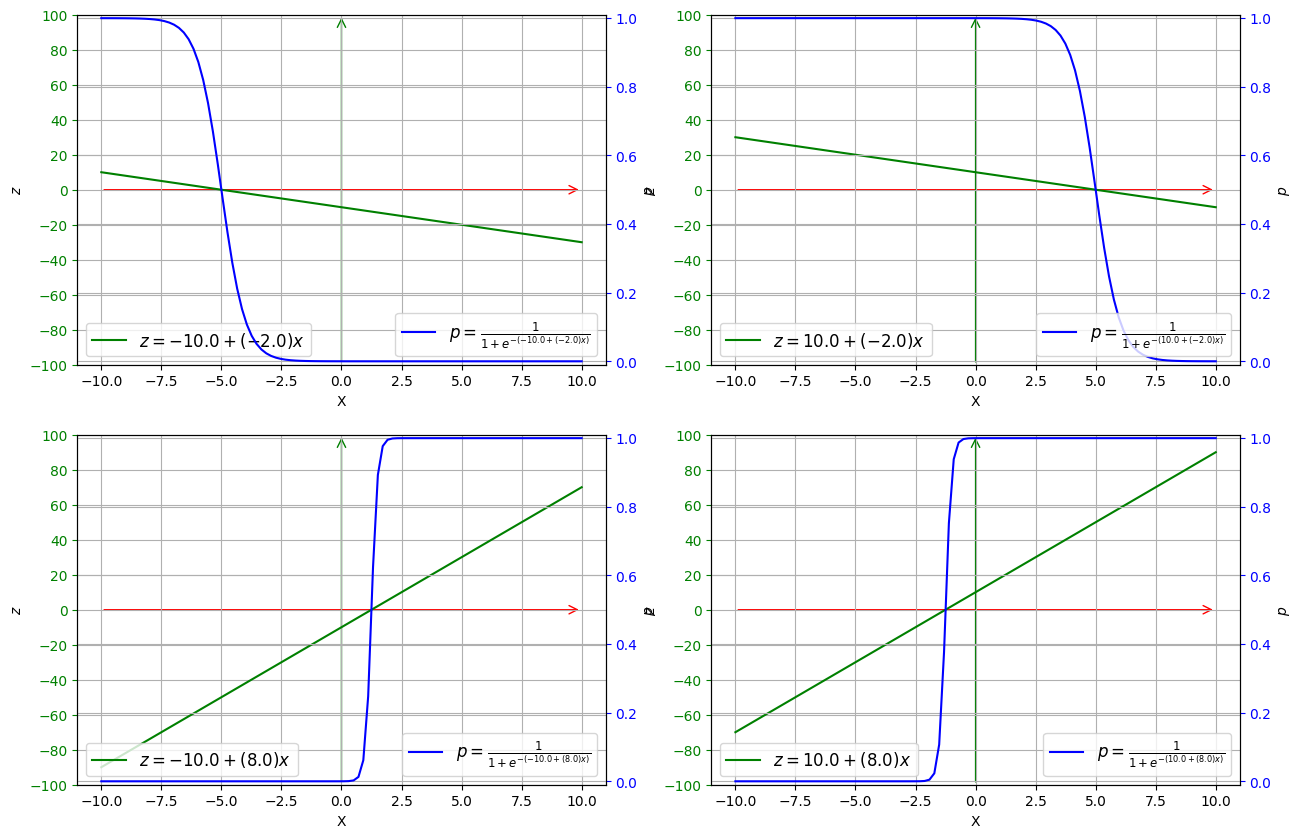

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.patches import FancyArrowPatch

xlim_min, xlim_max = -10, 10
X = np.linspace(xlim_min, xlim_max, 100)

zlim_min, zlim_max = -100, 100

# coef0 = np.array( [ [-10, 0, 10],
#                     [-10, 0, 10],
#                     [-10, 0, 10] ] )
# coef1 = np.array( [ [-2, -2, -2],
#                     [ 2,  2,  2],
#                     [ 8,  8,  8] ] )
coef0 = np.array( [ [-10, 10],
                    [-10, 10] ] )
coef1 = np.array( [ [-2, -2],
                    [ 8,  8] ] )

fig, axs = plt.subplots(2, 2, figsize=(15, 10))

for i, axs_row in enumerate(axs):
  for j, ax1 in enumerate(axs_row):

    Z = coef0[i, j] + coef1[i, j] * X

    ax1.plot(X, Z, color = "green", label = "$z = %.1f + (%.1f) x$" % (coef0[i, j], coef1[i, j]) )

    ax2 = ax1.twinx()
    ax2.plot(X, 1 / (1 + np.exp(-Z)), color = "blue", label = "$p = \\frac{1}{1 + e^{-(%.1f + (%.1f) x)}}$" % (coef0[i, j], coef1[i, j]))

    arrow_x = FancyArrowPatch((xlim_min, 0), (xlim_max, 0), color='red',
                              arrowstyle='->', mutation_scale=15)
    arrow_z = FancyArrowPatch((0, zlim_min), (0, zlim_max), color='green',
                              arrowstyle='->', mutation_scale=15)
    ax1.add_patch(arrow_x)
    ax1.add_patch(arrow_z)

    ax1.set_xlabel('X')
    ax1.set_ylabel('$z$')
    ax2.set_ylabel('$p$')

    ax1.set_ylim(zlim_min, zlim_max)
    ax2.set_ylim(-0.01, 1.01)

    ax1.tick_params('y', colors = "green")
    ax2.tick_params('y', colors = "blue")
    ax1.locator_params(axis = 'x', nbins = 10)
    ax1.locator_params(axis = 'y', nbins = 10)
    ax2.locator_params(axis = 'y', nbins = 10)
    ax1.grid(True)
    ax2.grid(True)

    ax1.legend(fontsize = 12, loc = "lower left")
    ax2.legend(fontsize = 12, loc = "lower right")
    # ax1.legend(fontsize = 15, loc = "best")
    # ax2.legend(fontsize = 15, loc = "best")

plt.show()

## <font color='lightblue'>The Log-Odds (Logit) Function, Logistic Regression Function & Decision Boundary</font>

To recap, in the context of a simple model with a single input feature $x_1$, the **Logistic Regression Model** is represented as:

$$z = \theta_0 + \theta_1 x_1$$

The probability of belonging to the positive class is given by the logistic sigmoid function:
$$P(\text{Positive Class}) = \frac{1}{1+e^{-z}} = \frac{1}{1+e^{-(\theta_0 + \theta_1 x_1)}}$$

Here, the logistic sigmoid function maps the linear combination $z = \theta_0 + \theta_1 x_1$ to a value between $0$ and $1$, interpreted as the probability that an input instance belongs to the positive class with label $y = 1$.

Thus, the **Logistic Regression Model** predicts the probability that the label $y$ is $1$ given input $x_1$:

$$p(y = 1 | x_1) = \frac{1}{1+e^{-(\theta_0 + \theta_1 x_1)}}$$


### <font color='lightyellow'>The Log-Odds (Logit) Function</font>

In probability theory, the **odds** of an event happening are defined as the ratio of the probability of the event occurring to the probability of it not occurring, thus if $p$ is the probability of success, then:
$$ odds = \frac{p}{1 - p}$$

In logistic regression, we first calculate the log-odds (also called the logit), which is a measure of how likely an observation belongs to the positive class. This log-odds is the natural logarithm of the odds of the event occurring.
$$ \text{log-odds}(p) = \text{logit}(p) = log \left( \frac{p}{1 - p} \right) $$

Where:
*   $p$ is the probability that the observation belongs to the positive class (i.e., $ p = P(\text{Positive Class}) $).
*   The odds is the ratio of the probability of the event happening to the probability of it not happening, i.e., $\frac{p}{1 - p}$​.



Further observation reveals:

$$ P(\text{Positive Class}) = p(y = 1 | x_1) = p = \frac{1}{1+e^{-z}} $$

$$ \frac{1}{p} - 1 = e^{-z} $$

$$ \frac{1 - p}{p} = \frac{1}{e^z} $$

$$ \frac{p}{1 - p} = e^z $$

$$ log \left( \frac{p}{1 - p} \right) = log( e^z ) $$

$$ log \left( \frac{p}{1 - p} \right) = z \cdot log( e ) = z \cdot 1 = z $$

$$ log \left( \frac{p}{1 - p} \right) = \theta_0 + \theta_1 x_1 $$

since $ z = \theta_0 + \theta_1 x_1 $.

Thus, the log-odds is also modeled as a linear combination of the input features $x_1, x_2, \ldots, x_n$, and $\theta_0, \theta_1$, and their corresponding coefficients $\theta_2, \ldots, \theta_n$:

$$z = \theta_0 + \theta_1 x_1 + \theta_2 x_2 + \ldots + \theta_n x_n$$

This expression represents the log-odds of the positive class before we transform it into a probability using the logistic (sigmoid) function. The value of zz can range from −∞−∞ to +∞+∞, and it's this value that determines the probability of classifying an observation as belonging to the positive class.


In summary, the **log-odds**, or **logit**, is the **natural logarithm of the odds** as defined by:

$$ \text{log-odds}(p) = \text{logit}(p) = log \left( \frac{p}{1 - p} \right) = z = \theta_0 + \theta_1 x_1 + \theta_2 x_2 \ldots + \theta_n x_n $$


### <font color='lightyellow'>The Decision Boundary</font>

In binary classification problems, an input instance is classified as the **positive** class (usually labeled as $y = 1$) if the predicted probability of the positive class is greater than or equal to 0.5 ($p(y = 1 | x_1) \geq 0.5$). This can be expressed as:

$$y =
\begin{cases}
  \text{0 (negative)} & \text{if } \frac{1}{1+e^{-(\theta_0 + \theta_1 x_1)}} < 0.5, \\
  \text{1 (positive)} & \text{if } \frac{1}{1+e^{-(\theta_0 + \theta_1 x_1)}} \geq 0.5
\end{cases}$$

This can also be written using an **indicator function**:
$$y = 1 \left(\frac{1}{1+e^{-(\theta_0 + \theta_1 x_1)}} \geq 0.5 \right)$$



The **decision boundary** is the point where the model is equally likely to predict either class — that is, when the probability of the positive class (label $y = 1$) is exactly 0.5 ($P\text{(Positive Class)} = 0.5$). This occurs when the logistic function satisfies the following:
$$ \frac{1}{1 + e^{-z}} = 0.5 $$

Thus, to find the decision boundary, we solve the equation for z:

$$ \frac{1}{1 + e^{-z}} = \frac{1}{2} $$

$$ 1 + e^{-z} = 2 $$

$$ e^{-z} = 1 $$

$$ -z = 0 $$

$$ z = 0 $$

$$ \theta_0 + \theta_1 x_1 = 0 $$

The **decision boundary**, where the probability is equal to 0.5 is thus the line:
$$ z = \theta_0 + \theta_1 x_1 = 0 \ \ \ \text{when} \ \ \ p(y = 1 | x_1) = \frac{1}{1+e^{-(\theta_0 + \theta_1 x_1)}} = 0.5 $$



**Summary**

The **decision boundary** is identified at the points where:

$$ p = 1 - p = \frac{1}{2} \rightarrow \frac{p}{1 - p} = 1 \rightarrow \log \left(\frac{p}{1 - p}\right) = 0 $$

$$ \rightarrow \text{logit}(p) = \log \left( \frac{p}{1 - p} \right) = z = \theta_0 + \theta_1 x_1 + \theta_2 x_2 + \dots + \theta_n x_n = 0 $$

$$ \rightarrow P(\text{Positive Class}) = p(y = 1 | x_1) = p = \frac{1}{1+e^{-z}}
  = \frac{1}{1+e^{-(\theta_0 + \theta_1 x_1 + \theta_2 x_2 + \dots + \theta_n x_n)}} = \frac{1}{2} $$


In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.ticker import AutoLocator

def plot_one_feature_logistic_regression_results(
                  X, y, model,
                  plot_data_points = True,
                  plot_predicted_points = True,
                  plot_predicted_probability_points = False,
                  plot_predicted_curve = False,
                  plot_logistic_regression_curve = False,
                  plot_logit_line = False,
                  X_new = None,
                  xlim = "auto",
                  ylim = (-0.1, 1.1),
                  figure_size = (8, 6),
                  title_font_size = 20
                 ):

  plt.figure(figsize=figure_size)

  if xlim == "auto":
    xlim_min, xlim_max = np.min(X[:, 0]), np.max(X[:, 0])
    dx = (xlim_max - xlim_min) * 0.1
    xlim_min, xlim_max = xlim_min - dx, xlim_max + dx
  else:
    xlim_min, xlim_max = xlim
  plt.xlim(xlim_min, xlim_max)
  plt.locator_params(axis = 'x', nbins = 20)
  plt.locator_params(axis = 'y', nbins = 20)

  x_values = np.linspace(xlim_min, xlim_max, 100).reshape(-1, 1)

  ylim_min, ylim_max = ylim
  plt.ylim(ylim_min, ylim_max)
  plt.xlabel('X')
  plt.ylabel('y')

  if plot_data_points:
    plt.scatter(X, y, color = "blue", s = 50, marker = "o",
                label = "Data Points")

  if model != None:

    if plot_predicted_curve:
      y_values = model.predict(x_values)
      plt.plot(x_values, y_values, color = "green",
               label = "Predicted Curve")

    if plot_logit_line or plot_logistic_regression_curve:
      logit_y_values = model.intercept_ + model.coef_ * x_values

      if plot_logit_line:
        plt.plot(x_values, logit_y_values, color = "orange",
                 linestyle='dashdot', label = "Logit Line")

      if plot_logistic_regression_curve:
        # p_values = 1 / (1 + np.exp(-logit_y_values))   # This works too
        p_values = model.predict_proba(x_values)[:, 1]
        plt.plot(x_values, p_values, color = "orange",
                 linestyle='dotted', label = "Logistic Sigmoid Curve")

      plt.axhline(y = 0.5, color = "orange",
                  linestyle='dashed')

    if plot_predicted_points:
      y_pred = model.predict(X)
      plt.scatter(X, y_pred, color = "green", alpha=0.5, s = 70, marker = "*",
                  # edgecolors = 'lightblue', linewidths = 5,
                  label = "Predicted Points")

    if plot_predicted_probability_points:
      p_pred = model.predict_proba(X)[:, 1]
      plt.scatter(X, p_pred, color = "orange", alpha=0.5, s = 30, marker = "o",
                  label = "Predicted Probability")

    if X_new is not None:
      y_pred_new = model.predict(X_new)
      plt.scatter(X_new, y_pred_new, color = "cyan", alpha=0.9, s = 150, marker = "*",
                  label = "New Predicted Points")

    # plt.title("$p(y = 1 | X) = \\frac{1}{1 + e^{-(%.3f + (%.3f) X )}}$" % (model.intercept_, model.coef_),
    #           fontsize = title_font_size)
    title_text = "Logit: $z = %.3f + (%.3f) X$\nSigmoid: $p(y = 1 | X) = \\frac{1}{1 + e^{-z}}$" % (model.intercept_, model.coef_)
    plt.title(title_text, fontsize = title_font_size)

  plt.legend()
  plt.grid(True)

  # plt.show()

def plot_predicted_results(X, y, model, X_new = None):
  plot_one_feature_logistic_regression_results(
                X, y, model,
                plot_data_points = True,
                plot_predicted_points = True,
                plot_predicted_probability_points = True,
                plot_predicted_curve = True,
                plot_logistic_regression_curve = True,
                plot_logit_line = True,
                X_new = X_new
              )

def plot_points(X, y):
  plot_one_feature_logistic_regression_results( X, y, model = None, plot_data_points = True)

In [5]:
import seaborn as sns

def plot_confusion_matrix(confusion_matrix,
                          figure_size = (3, 3),
                          title_font_size = 15,
                          font_size = 12):

  num_classes = confusion_matrix.shape[0]
  fig, ax = plt.subplots(figsize = figure_size)

  # class_names=[0,1] # name of classes
  # tick_marks = np.arange(len(class_names))
  class_names = np.arange(num_classes) # name of classes
  tick_marks  = np.arange(num_classes)

  plt.xticks(tick_marks, class_names)
  plt.yticks(tick_marks, class_names)

  # create heatmap
  sns.heatmap(pd.DataFrame(confusion_matrix),
              annot = True, cmap = "YlGnBu", fmt = 'g')

  ax.xaxis.set_label_position("top")
  plt.tight_layout()

  plt.title('Confusion matrix', y = 1.1, fontsize = title_font_size)
  plt.ylabel('Actual Labels', fontsize = font_size)
  plt.xlabel('Predicted Labels', fontsize = font_size)

## <font color='lightblue'>Types of Logistic Regression</font>

### 1. Binary Logistic Regression
- **Description:** Predicts the probability of an observation belonging to one of two classes (0 or 1).
- **Example:** Predicting whether an email is spam (1) or not (0).

### 2. Multiclass/Multinomial Logistic Regression
- **Description:** Extends logistic regression to handle more than two classes.
- **Also Known As:** Multinomial Logistic Regression.
- **Example:** Predicting the genre of a movie (Action, Drama, Comedy).

### 3. Single-Predictor/Univariate Logistic Regression
- **Description:** Involves one independent variable to predict binary outcomes.
- **Example:** Predicting student pass/fail based on hours of study.

### 4. Multiple/Multivariate Logistic Regression
- **Description:** Uses multiple independent variables for binary classification.
- **Example:** Predicting loan approval based on income, credit score, and age.

### Key Takeaways
- **Binary vs. Multiclass:** Consider the number of classes in the dependent variable.
- **Single vs. Multiple Predictors:** Examine the number of independent variables used for prediction.


## <font color='lightblue'>Single-Predictor Binary Logistic Regression</font>

**Single-Predictor Logistic Regression** refers to logistic regression with a single **independent variable**, sometimes also known as:
- One-Predictor Binary Logistic Regression
- Single-Variable Binary Logistic Regression
- One-Variable Binary Logistic Regression
- Univariate Binary Logistic Regression

**Binary Logistic Regression** refers to logistic regression with an outcome variable (**dependent variable**) being binary, meaning it can take one of two values (usually coded as $0$ and $1$).


#### <font color='lightgreen'>Creating and Fitting Single-Predictor Binary Logistic Regression</font>

Consider a $m \times 1$ input data matrix $\mathbf{X}$ for our independent variables (also known as features or predictors) and $\mathbf{y}$ for our dependent variable containing the label values:

$$
\mathbf{X} =
  \begin{bmatrix}
    x^{(1)} \\
    x^{(2)} \\
    \vdots \\
    x^{(m)}
  \end{bmatrix}, \ \ \ \
\mathbf{y} =
  \begin{bmatrix}
    y^{(1)} \\
    y^{(2)} \\
    \vdots \\
    y^{(m)}
  \end{bmatrix}
$$  

Here, $m$ represents the data size (number of points = number of observations), and the data dimension (number of features) is $1$.

Each element $y^{(i)}$ in $\mathbf{y}$ typically contains the integer value of $1$ to represent the **positive class**, and $0$ otherwise.
<br>

The **Single-Predictor Binary Logistic Regression** aims to fit the input data ($\mathbf{X}$) to obtain the **best-fit** model parameters $\theta_0$ and $\theta_1$, which are  are learned through the training process (usually by minimizing the *cost function*), leading to:

$$ z^{(i)} = \theta_0 + \theta_1 x^{(i)}  \ \ \ \ \ \text{for } i = 1, 2, \ldots, m.$$

$$ p(y^{(i)} = 1 | x^{(i)}) = \frac{1}{1+e^{-(z^{(i)})}}  \ \ \ \ \ \text{for } i = 1, 2, \ldots, m.$$

$$ p(y^{(i)} = 1 | x^{(i)}) = \frac{1}{1+e^{-(\theta_0 + \theta_1 x^{(i)})}}  \ \ \ \ \ \text{for } i = 1, 2, \ldots, m.$$
<br>

It is customary to classify an input instance as the positive class (usually labeled as $y = 1$) if $p(y^{(i)} = 1 | x^{(i)}) \geq 0.5$. Consequently, the predicted label $\hat{y}^{(i)}$ is determined as follows:

$$\hat{y}^{(i)} =
\begin{cases}
  0 & \text{if } \frac{1}{1+e^{-(\theta_0 + \theta_1 x^{(i)})}} < 0.5, \\
  1 & \text{if } \frac{1}{1+e^{-(\theta_0 + \theta_1 x^{(i)})}} \geq 0.5
\end{cases} \ \ \ \ \ \text{for } i = 1, 2, \ldots, m.$$

The above expression is commonly denoted using an **indicator function**
$$ \hat{y}^{(i)} = 1 \left( \frac{1}{1+e^{-(\theta_0 + \theta_1 x^{(i)}) }} \geq 0.5
 \right) \ \ \ \ \ \text{for } i = 1, 2, \ldots, m.
$$
<br>

The predicted label vector is represented as:
$$
\mathbf{\hat{y}} =
  \begin{bmatrix}
    \hat{y}^{(1)} \\
    \hat{y}^{(2)} \\
    \vdots \\
    \hat{y}^{(m)}
  \end{bmatrix}
$$
<br>

The logistic regression model aims to find the optimal values for the pair of parameters $\theta_0$ and $\theta_1$ that minimize the **cost function** and provide the **best fit** for the data. This function measures the difference between the model’s predictions and the actual labels in the training data. The cost function for logistic regression is based on the log-likelihood of the observed labels given the model's predictions. Further discussion on the cost function will be presented later.


### <font color='lightyellow'>Single-Predictor Binary Logistic Regression With `scikit-learn`: Example 1</font>

In [6]:
# Data
X = np.array([0, 0.5, 1, 1.5, 2, 2.5, 3, 3.5, 8.5, 9]).reshape((-1, 1))
y = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])

print(X)
print(y)
print(X.shape)
print(y.shape)

[[0. ]
 [0.5]
 [1. ]
 [1.5]
 [2. ]
 [2.5]
 [3. ]
 [3.5]
 [8.5]
 [9. ]]
[0 0 0 0 1 1 1 1 1 1]
(10, 1)
(10,)


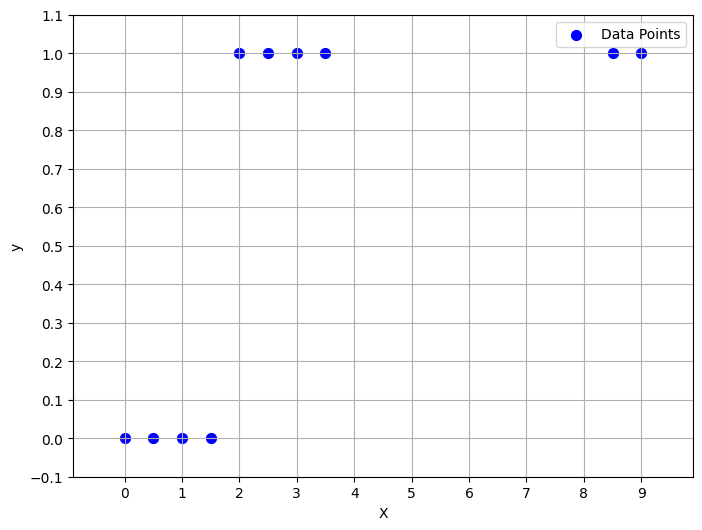

In [7]:
plot_points(X, y)

#### <font color='lightgreen'>Linear Regression Not Suitable Tool</font>

Why?
*   The data shown below has a non-linear relationship, which isn't ideal for logistic regression that has an s-shaped curve.
*   The target variable y takes binary values (0 or 1), which is more common in classification tasks. Using linear regression which is designed for continuous outcomes would lead to outcomes that are not constrained between 0 and 1.

In [8]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(X, y)

r_sq = model.score(X, y)

print(f"coefficient of determination: {r_sq}")
print(f"intercept: {model.intercept_}")
print(f"slope: {model.coef_}")

y_pred = model.predict(X)
print(f"predicted response:\n{y_pred}")

coefficient of determination: 0.4313395113732098
intercept: 0.2603201347935972
slope: [0.10783488]
predicted response:
[0.26032013 0.31423757 0.36815501 0.42207245 0.47598989 0.52990733
 0.58382477 0.63774221 1.1769166  1.23083404]


<ipython-input-4-e08b0e75c97a>:84: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  title_text = "Logit: $z = %.3f + (%.3f) X$\nSigmoid: $p(y = 1 | X) = \\frac{1}{1 + e^{-z}}$" % (model.intercept_, model.coef_)


Text(0.5, 1.0, '$y$ = (0.260) + (0.108) $x$\n$R^2$ = 0.431')

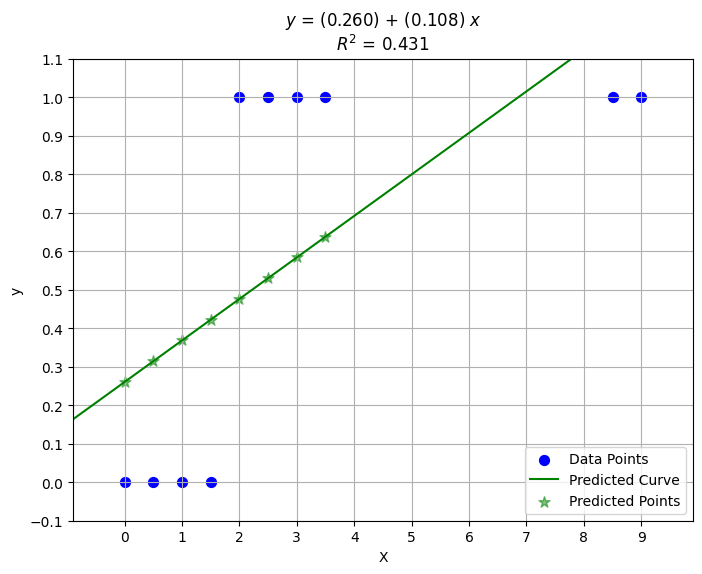

In [9]:
plot_one_feature_logistic_regression_results(X, y, model = model, plot_predicted_points = True,
                                        plot_predicted_curve = True)
coef_value = model.coef_[0]
plt.title("$y$ = (%0.3f) + (%0.3f) $x$\n$R^2$ = %0.3f" % (model.intercept_, coef_value, r_sq))


#### <font color='lightgreen'>Create and Fitting the Model Using `scikit-learn` </font>


In [10]:
# Logistic Regression model
model = LogisticRegression(solver = 'liblinear', random_state = 0)

# Fitting the model
model.fit(X, y)

LogisticRegression(random_state=0, solver='liblinear')

In [11]:
# Evaluating model accuracy
mean_accuracy = model.score(X, y)
print(f"mean_accuracy = {mean_accuracy}")

print(f"y = {y}")

y_pred = model.predict(X)
print(f"y_pred = {y_pred}")

mean_accuracy_eq = np.sum(y == y_pred) / len(y)
print(mean_accuracy_eq)

mean_accuracy = 0.9
y = [0 0 0 0 1 1 1 1 1 1]
y_pred = [0 0 0 1 1 1 1 1 1 1]
0.9


In [12]:
# Output model parameters
print(f"intercept_ = {model.intercept_}")
print(f"coefficient_ = {model.coef_}")

# Output model classes
print("model classes = ", model.classes_)

# Predicted probabilities
p_pred = model.predict_proba(X)
print(f"Predicted probabilities from the model:\n{p_pred}")

# Manually compute probabilities using equation
logit_y_values = model.intercept_ + model.coef_ * X
p_pred_eq = 1 / (1 + np.exp(-logit_y_values))
p_pred_eq = np.append(1 - p_pred_eq, p_pred_eq, axis = 1)
print(f"Manually computed probabilities:\n{p_pred_eq}")

# Checking that results from both methods are very close, up to 0.0000001 margin of error
print(np.abs(p_pred - p_pred_eq) < 0.0000001)

intercept_ = [-0.85243488]
coefficient_ = [[0.78352294]]
model classes =  [0 1]
Predicted probabilities from the model:
[[0.70107767 0.29892233]
 [0.61317392 0.38682608]
 [0.51722117 0.48277883]
 [0.41998145 0.58001855]
 [0.32858078 0.67141922]
 [0.24854779 0.75145221]
 [0.18270401 0.81729599]
 [0.1312564  0.8687436 ]
 [0.0029959  0.9970041 ]
 [0.00202679 0.99797321]]
Manually computed probabilities:
[[0.70107767 0.29892233]
 [0.61317392 0.38682608]
 [0.51722117 0.48277883]
 [0.41998145 0.58001855]
 [0.32858078 0.67141922]
 [0.24854779 0.75145221]
 [0.18270401 0.81729599]
 [0.1312564  0.8687436 ]
 [0.0029959  0.9970041 ]
 [0.00202679 0.99797321]]
[[ True  True]
 [ True  True]
 [ True  True]
 [ True  True]
 [ True  True]
 [ True  True]
 [ True  True]
 [ True  True]
 [ True  True]
 [ True  True]]


<ipython-input-4-e08b0e75c97a>:84: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  title_text = "Logit: $z = %.3f + (%.3f) X$\nSigmoid: $p(y = 1 | X) = \\frac{1}{1 + e^{-z}}$" % (model.intercept_, model.coef_)


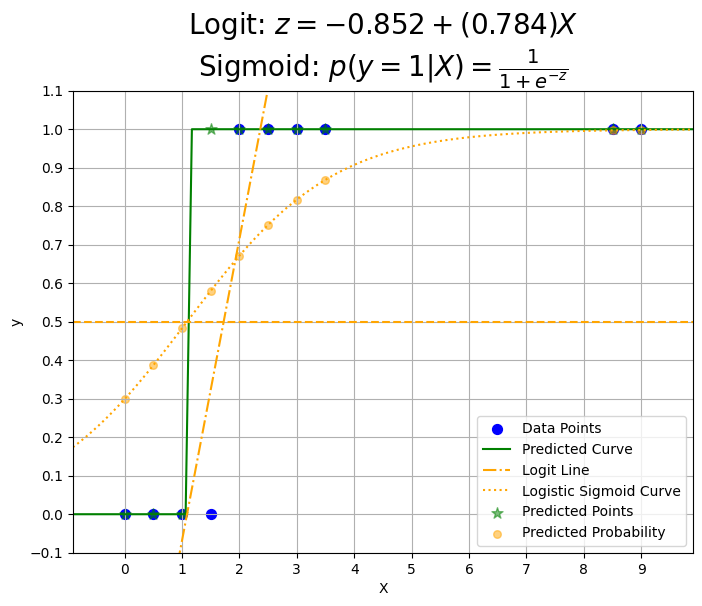

In [13]:
plot_predicted_results(X, y, model = model)

#### <font color='lightgreen'>Confusion Matrix, Precision, Recall & $F_1$- Score</font>

[[3 1]
 [0 6]]


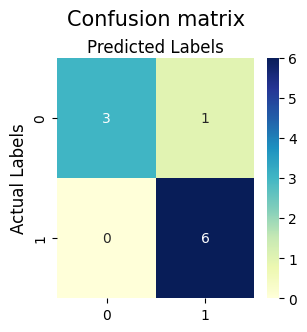

In [14]:
c_matrix = confusion_matrix(y, y_pred)
print(c_matrix)

plot_confusion_matrix(c_matrix)

In [15]:
report = classification_report(y, y_pred)
print(report)

              precision    recall  f1-score   support

           0       1.00      0.75      0.86         4
           1       0.86      1.00      0.92         6

    accuracy                           0.90        10
   macro avg       0.93      0.88      0.89        10
weighted avg       0.91      0.90      0.90        10



Given:

$tp = \text{True Positive = Correct Result} $  
$fp = \text{False Positive = Unexpected Result (predicted but not observed)} $  
$fn = \text{False Negative = Missing Result (not predicted but observed)} $  

**Precision:**
- Precision is the ratio of correctly predicted positive observations to the total predicted positives.
- It measures the accuracy of the positive predictions made by the model.
- A high precision indicates that when the model predicts a positive class, it is likely to be correct.
- **Precision is more critical where false positives are costly, example in spam email detection.**
- Formula: $ precision = \frac{tp}{tp + fp} $

**Recall** (Sometimes it is called **Sensitivity**):
- Recall is the ratio of correctly predicted positive observations to the total actual positives.
- It measures the ability of the model to capture all the positive instances in the dataset.
- A high recall indicates that the model is good at finding all the positive instances in the dataset.
- **Recall is more critical where false negatives are costly, example in fraud detection**
- Formula: $ recall = \frac{tp}{tp + fn} $

**F1-score**
- The F1-score is the harmonic mean of precision and recall. It provides a balance between precision and recall, considering both false positives and false negatives.
- It ranges from $0$ to $1$, where:
  - $1$ indicates perfect precision and recall,
  - $0$ indicates poor performance.
- It is particularly useful when there is an imbalance between the classes in the dataset. It penalizes models that favor one metric over the other.
- Formula: $ F_1 = \frac{2 \ \text{x} \  precision \ \text{x} \ recall}{precision \ + \ recall} $

**Support**
- Support represents the number of actual occurrences of each class in the specified dataset.
- It is the count of true instances for each class.
- It helps in understanding the distribution of classes in the dataset.
- Example: If your dataset has 1000 instances, and 200 are of class 1, the support for class 1 is 200.

Reference: https://scikit-learn.org/stable/modules/model_evaluation.html#precision-recall-f-measure-metrics


In [16]:
def my_precision_recall_fscore_support(confusion_matrix):
  num_class = confusion_matrix.shape[0]
  support = np.sum(confusion_matrix, axis = 1)
  pred = np.sum(confusion_matrix, axis = 0)
  tp = np.diag(c_matrix)
  fp = pred - tp
  fn = support - tp
  precision = tp / (tp + fp)
  recall = tp / (tp + fn)
  f1_score = 2 * precision * recall / (precision + recall)

  return precision, recall, f1_score, support

def my_classification_report(y, y_pred, target_names = None):
  c_matrix = confusion_matrix(y, y_pred)
  num_class = c_matrix.shape[0]
  precision, recall, f1_score, support = my_precision_recall_fscore_support(c_matrix)

  if target_names == None:
    spaces_string = " " * 14
  else:
    max_length = len(max(target_names, key=len))
    spaces_string = " " * (max_length + 2)

  str = "%sprecision    recall  f1-score   support\n\n" % spaces_string

  for i in range(num_class):
    if target_names == None:
      str += "%12d  " % i
    else:
      str += f"%{max_length}s  " % target_names[i]

    str += "%9.2f%10.2f%10.2f%10d\n" % (precision[i], recall[i], f1_score[i], support[i])
  return str

In [17]:
report = my_classification_report(y, y_pred)
print(report)

              precision    recall  f1-score   support

           0       1.00      0.75      0.86         4
           1       0.86      1.00      0.92         6



#### <font color='lightgreen'>Predict New Data Points</font>

X_new = [[0.2]
 [4. ]
 [7. ]]
y_pred_new = [0 1 1]


<ipython-input-4-e08b0e75c97a>:84: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  title_text = "Logit: $z = %.3f + (%.3f) X$\nSigmoid: $p(y = 1 | X) = \\frac{1}{1 + e^{-z}}$" % (model.intercept_, model.coef_)


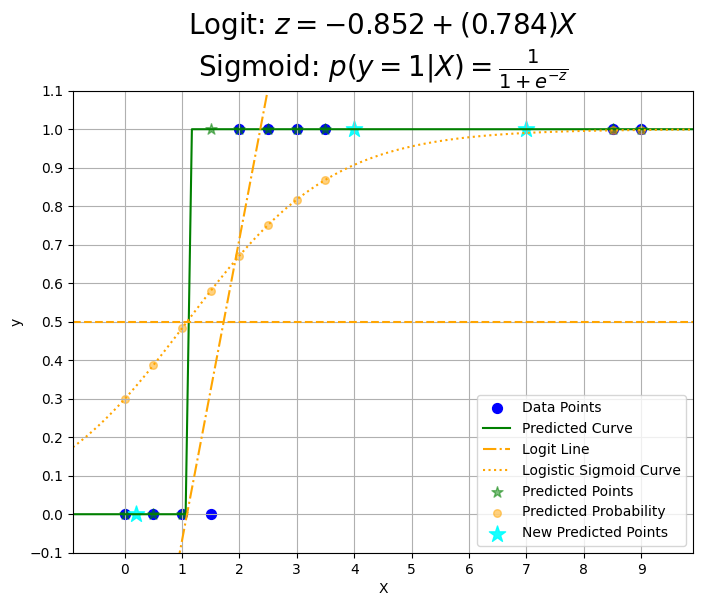

In [18]:
X_new = np.array([0.2, 4, 7]).reshape((-1, 1))
print("X_new =", X_new)

y_pred_new = model.predict(X_new)
print("y_pred_new =", y_pred_new)

plot_predicted_results(X, y, model = model, X_new = X_new)

In [20]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Define the parameter grid for C
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}

# Create the logistic regression model
model = LogisticRegression(solver='liblinear')

# Set up grid search cross-validation
grid_search = GridSearchCV(model, param_grid, cv=5)  # 5-fold cross-validation

# Fit the model and find the best C
grid_search.fit(X, y)

# Print the best C and the corresponding score
print(f"Best C: {grid_search.best_params_['C']}")
print(f"Best cross-validation score: {grid_search.best_score_}")

Best C: 10
Best cross-validation score: 0.9


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


#### <font color='lightgreen'>Improve the Model</font>

Set regularization strength C equal to 10.0, instead of the default value of 1.0:
- Regularization is a technique used to prevent overfitting by adding a penalty term to the model's loss function. This helps the model avoid becoming too sensitive to small fluctuations or noise in the training data.
- In logistic regression, the regularization strength is controlled by the parameter C, which denotes the inverse of the regularization strength. Higher values of C correspond to less regularization, which leads to a model that fits the training data more closely.
- In this case, we increased the value of C to weaken regularization, making it fit the data more closely.

So, C essentially controls the tradeoff between bias and variance:
*   Large C = Less regularization → Lower bias but higher
variance (potential overfitting).
*   Small C = More regularization → Higher bias but lower variance (potential underfitting).

In [ ]:
# Logistic Regression model
model_reg = LogisticRegression(solver = 'liblinear', C = 10.0, random_state = 0)

# Fitting the model
model_reg.fit(X, y)

In [ ]:
# Evaluating model accuracy
mean_accuracy = model_reg.score(X, y)
print(f"mean_accuracy = {mean_accuracy}")

print(f"y = {y}")

y_pred = model_reg.predict(X)
print(f"y_pred = {y_pred}")

mean_accuracy_eq = np.sum(y == y_pred) / len(y)
print(mean_accuracy_eq)

In [ ]:
# Output model parameters
print(f"intercept_ = {model_reg.intercept_}")
print(f"coefficient_ = {model_reg.coef_}")

# Output model classes
print(model_reg.classes_)

# Predicted probabilities
p_pred = model_reg.predict_proba(X)
print(p_pred)

# Manually compute probabilities using equation
logit_y_values = model_reg.intercept_ + model_reg.coef_ * X
p_pred_eq = 1 / (1 + np.exp(-logit_y_values))
p_pred_eq = np.append(1 - p_pred_eq, p_pred_eq, axis = 1)
print(p_pred_eq)

# Checking that results from both methods are very close, up to 0.0000001 margin of error
print(np.abs(p_pred - p_pred_eq) < 0.0000001)

In [ ]:
plot_predicted_results(X, y, model = model_reg)

In [ ]:
c_matrix = confusion_matrix(y, y_pred)
print(c_matrix)

plot_confusion_matrix(c_matrix)

In [ ]:
report = classification_report(y, y_pred)
print(report)

In [ ]:
report = my_classification_report(y, y_pred)
print(report)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Function to plot model results (decision boundary, data points, and predictions)
def plot_comparison(X, y, model_1, model_2, label_1, label_2, title="Model Comparison"):
    plt.figure(figsize=(10, 6))

    # Define a range of values for X (to plot the decision boundaries)
    x_values = np.linspace(np.min(X) - 1, np.max(X) + 1, 100).reshape(-1, 1)

    # Predict probabilities for each model using the same x values
    p_pred_1 = model_1.predict_proba(x_values)[:, 1]
    p_pred_2 = model_2.predict_proba(x_values)[:, 1]

    # Plot the data points
    plt.scatter(X, y, color='blue', s=50, marker='o', label="Data Points")

    # Plot the predicted curves for both models
    plt.plot(x_values, p_pred_1, color='green', label=f"Predicted Probabilities ({label_1})")
    plt.plot(x_values, p_pred_2, color='orange', label=f"Predicted Probabilities ({label_2})")

    # Plot decision boundary for both models
    plt.axhline(y=0.5, color='black', linestyle='--', label="Decision Boundary (y = 0.5)")

    # Labels and Title
    plt.xlabel("X")
    plt.ylabel("Probability of y = 1")
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.show()

# Compare the two models (model and model_reg)
plot_comparison(X, y, model, model_reg, label_1="C=1.0", label_2="C=10.0")

### <font color='lightyellow'>Binary Logistic Regression With `scikit-learn`: Example 2</font>

In [ ]:
X = np.array([0, 0.5, 1, 1.5, 2, 2.5, 3, 3.5, 8.5, 9]).reshape((-1, 1))
y = np.array([0, 1, 0, 0, 1, 1, 1, 1, 1, 1])

print(X)
print(y)
print(X.shape)
print(y.shape)

model = LogisticRegression(solver = 'liblinear', C = 10.0, random_state = 0)

model.fit(X, y)

mean_accuracy = model.score(X, y)
print(f"mean_accuracy = {mean_accuracy}")

print(f"y = {y}")

y_pred = model.predict(X)
print(f"y_pred = {y_pred}")

mean_accuracy_eq = np.sum(y == y_pred) / len(y)
print(mean_accuracy_eq)

print(f"intercept_ = {model.intercept_}")
print(f"coefficient_ = {model.coef_}")

print(model.classes_)

p_pred = model.predict_proba(X)
print(p_pred)

# Compute probability using equation
logit_y_values = model.intercept_ + model.coef_ * X
p_pred_eq = 1 / (1 + np.exp(-logit_y_values))
p_pred_eq = np.append(1 - p_pred_eq, p_pred_eq, axis = 1)
print(p_pred_eq)

print(np.abs(p_pred - p_pred_eq) < 0.0000001)

In [ ]:
plot_predicted_results(X, y, model = model)

In [ ]:
c_matrix = confusion_matrix(y, y_pred)
print(c_matrix)

plot_confusion_matrix(c_matrix)

In [ ]:
report = classification_report(y, y_pred)
print(report)

In [ ]:
report = my_classification_report(y, y_pred)
print(report)

## <font color='lightblue'>Multiple-Predictor Binary Logistic Regression</font>

**Multiple-Predictor Logistic Regression** refers to logistic regression with multiple **independent variable**, sometimes it is also known as:
- Multiple Binary Logistic Regression
- Multiple Logistic Regression for Binary Classification
- Multiple Binary Logistic Regression
- Multiple Binary Logistic Regression with Multiple Predictors

**Binary Logistic Regression** refers to logistic regression with an outcome variable (**dependent variable**) being binary, meaning it can take one of two values (usually coded as $0$ and $1$).


#### <font color='lightgreen'>Create and Fitting Multiple-Predictor Binary Logistic Regression</font>

Consider a $m \times n$ input data matrix $\mathbf{X}$ for our independent variables (also known as features or predictors) and $\mathbf{y}$ for our dependent variable containing the label values:

$$
\mathbf{X} =
  \begin{bmatrix}
    x_1^{(1)} & x_2^{(1)} & \cdots & x_n^{(1)} \\
    x_1^{(2)} & x_2^{(2)} & \cdots & x_n^{(2)} \\
    \vdots    & \vdots    & \ddots & \vdots    \\
    x_1^{(m)} & x_2^{(m)} & \cdots & x_n^{(m)}
  \end{bmatrix}, \ \ \ \
\mathbf{y} =
  \begin{bmatrix}
    y^{(1)} \\
    y^{(2)} \\
    \vdots \\
    y^{(m)}
  \end{bmatrix}
$$
<br>

Here, $m$ represents the data size (number of points = number of observations), and the $n$ represents the data dimension (number of features).

Each element $y^{(i)}$ in $\mathbf{y}$ typically contains the integer value of $1$ to represent the **positive class**, and $0$ otherwise.
<br>

The **Multiple-Predictor Binary Logistic Regression** aims to fit the input data ($\mathbf{X}$) to obtain the **best-fit** model parameters $\theta_0, \theta_1, \ldots, \theta_n $ leading to:

$$ z^{(1)} = \theta_0 + \theta_1 x_1^{(1)} + \theta_2 x_2^{(1)} + \ldots + \theta_n x_n^{(1)} $$
$$ z^{(2)} = \theta_0 + \theta_1 x_1^{(2)} + \theta_2 x_2^{(2)} + \ldots + \theta_n x_n^{(2)} $$
$$ \vdots $$
$$ z^{(m)} = \theta_0 + \theta_1 x_1^{(m)} + \theta_2 x_2^{(m)} + \ldots + \theta_n x_n^{(m)} $$

If we define vector $\mathbf{z}$ and $\mathbf{\theta}$, and rewrite $\mathbf{X}$ by augmenting an extra column of ones in the first column (the new $\mathbf{\theta}$ is often called **Augmented Data Matrix** , we have

$$
\mathbf{z} =
  \begin{bmatrix}
    z^{(1)} \\
    z^{(2)} \\
    \vdots \\
    z^{(m)}
  \end{bmatrix}, \ \ \ \
\mathbf{X} =
  \begin{bmatrix}
    1 & x_1^{(1)} & x_2^{(1)} & \cdots & x_n^{(1)} \\
    1 & x_1^{(2)} & x_2^{(2)} & \cdots & x_n^{(2)} \\
    \vdots & \vdots    & \vdots    & \ddots & \vdots    \\
    1 & x_1^{(m)} & x_2^{(m)} & \cdots & x_n^{(m)}
  \end{bmatrix}, \ \ \ \
\mathbf{\theta} =
  \begin{bmatrix}
    \theta_0 \\
    \theta_1 \\
    \theta_2 \\
    \vdots \\
    \theta_n
  \end{bmatrix}
$$

we get
$$
\mathbf{z} =
  \begin{bmatrix}
    z^{(1)} \\
    z^{(2)} \\
    \vdots \\
    z^{(m)}
  \end{bmatrix} =
  \begin{bmatrix}
    \theta_0 + \theta_1 x_1^{(1)} + \theta_2 x_2^{(1)} + \ldots + \theta_n x_n^{(1)} \\
    \theta_0 + \theta_1 x_1^{(2)} + \theta_2 x_2^{(2)} + \ldots + \theta_n x_n^{(2)} \\
    \vdots \\
    \theta_0 + \theta_1 x_1^{(m)} + \theta_2 x_2^{(m)} + \ldots + \theta_n x_n^{(m)} \\
  \end{bmatrix} =
  \begin{bmatrix}
    1 & x_1^{(1)} & x_2^{(1)} & \cdots & x_n^{(1)} \\
    1 & x_1^{(2)} & x_2^{(2)} & \cdots & x_n^{(2)} \\
    \vdots & \vdots    & \vdots    & \ddots & \vdots  \\
    1 & x_1^{(m)} & x_2^{(m)} & \cdots & x_n^{(m)}
  \end{bmatrix}
  \begin{bmatrix}
    \theta_0 \\
    \theta_1 \\
    \theta_2 \\
    \vdots \\
    \theta_n
  \end{bmatrix}
$$
<br>

$$ \mathbf{z} = \mathbf{X} \mathbf{\theta} $$
<br>

To predict the label
$$ p(y^{(i)} = 1 | x_1^{(i)}, x_2^{(i)}, \ldots, x_n^{(i)}) = \frac{1}{1+e^{-(z^{(i)})}}   \ \ \ \ \ \text{for } i = 1, 2, \ldots, m. $$

$$ p(y^{(i)} = 1 | x_1^{(i)}, x_2^{(i)}, \ldots, x_n^{(i)}) = \frac{1}{1+e^{-(\theta_0 + \theta_1 x_1^{(i)} + \theta_2 x_2^{(i)} + \ldots + \theta_n x_n^{(i)}) }}   \ \ \ \ \ \text{for } i = 1, 2, \ldots, m. $$
<br>

This can be written more compactly as
$$ \mathbf{p}( \mathbf{y} = 1 | \mathbf{X} ) = \frac{1}{1+e^{-\mathbf{X}\mathbf{\theta} }}$$
<br>

It is customary to classify an input instance as the positive class (usually labeled as $y = 1$) if $p(y^{(i)} = 1 | x_1^{(i)}, x_1^{(i)}, \ldots, x_n^{(i)}) \geq 0.5$. Consequently, the predicted label $\hat{y}^{(i)}$ is determined as follows:

$$\hat{y}^{(i)} =
\begin{cases}
  0 & \text{if } \frac{1}{1+e^{-(\theta_0 + \theta_1 x_1^{(i)} + \theta_2 x_2^{(i)} + \ldots + \theta_n x_n^{(i)})}} < 0.5, \\
  1 & \text{if } \frac{1}{1+e^{-(\theta_0 + \theta_1 x_1^{(i)} + \theta_2 x_2^{(i)} + \ldots + \theta_n x_n^{(i)})}} \geq 0.5.
\end{cases}  \ \ \ \ \ \text{for } i = 1, 2, \ldots, m. $$

The above expression is commonly denoted using an **indicator function**
$$ \hat{y}^{(i)} = 1 \left( \frac{1}{1+e^{-(\theta_0 + \theta_1 x_1^{(i)} + \theta_2 x_2^{(i)} + \ldots + \theta_n x_n^{(i)}) }} \geq 0.5
 \right)  \ \ \ \ \ \text{for } i = 1, 2, \ldots, m.
$$
<br>

The predicted label vector is thus as:
$$
\mathbf{\hat{y}} =
  \begin{bmatrix}
    \hat{y}^{(1)} \\
    \hat{y}^{(2)} \\
    \vdots \\
    \hat{y}^{(m)}
  \end{bmatrix}
$$

$$
\mathbf{\hat{y}} = 1 \left( \frac{1}{1+e^{-\mathbf{X}\mathbf{\theta} }} \geq 0.5 \right)
$$
<br>

The logistic regression model aims to find the optimal values for the parameters $ \theta_0, \theta_1, \ldots, \theta_n $ that minimize the **cost function** and provide the **best fit** for the data. Further discussion on the cost function will be presented later.

#### <font color='lightgreen'>The Data</font>

In [ ]:
X = np.array( [ [  5, 35],
                [ 10, 50],
                [ 25, 50],
                [ 40, 15],
                [ 25, 90],
                [ 40, 40],
                [ 75, 75],
                [ 80, 15],
                [ 90, 60],
                [100, 40]
              ] )

y = np.array( [0, 0, 0, 0, 0, 1, 1, 1, 1, 1] )

print(X)
print(y)
print(X.shape)
print(y.shape)

In [ ]:
model = LogisticRegression(solver = 'liblinear', C = 20, random_state = 42,
                           tol = 1e-10, max_iter = 1000)

# TO DO: Try C = 30
# model = LogisticRegression(solver = 'liblinear', C = 30, random_state = 42,
#                            tol = 1e-10, max_iter = 1000)

model.fit(X, y)

In [ ]:
mean_accuracy = model.score(X, y)
print(f"mean_accuracy = {mean_accuracy}")

print(f"y = {y}")

y_pred = model.predict(X)
print(f"y_pred = {y_pred}")

mean_accuracy_eq = np.sum(y == y_pred) / len(y)
print(mean_accuracy_eq)

In [ ]:
print(f"n_iter_ = {model.n_iter_}")
print(f"intercept_ = {model.intercept_}")
print(f"coefficient_ = {model.coef_}")

print(model.classes_)

p_pred = model.predict_proba(X)
print(p_pred)

# Compute probability using equation
# NOTE: we need to sum up over the 2 features using np.sum()
logit_y_values = model.intercept_ + np.sum(model.coef_ * X, axis = 1).reshape((-1, 1))
p_pred_eq = 1 / (1 + np.exp(-logit_y_values))
p_pred_eq = np.append(1 - p_pred_eq, p_pred_eq, axis = 1)
print(p_pred_eq)

print(np.abs(p_pred - p_pred_eq) < 0.0000001)

In [ ]:
import plotly.graph_objects as go

points = go.Scatter3d(
                      x = X[:, 0],
                      y = X[:, 1],
                      z = y.reshape(-1),
                      mode = 'markers',
                      marker = {"size": 8, "color": "blue"},
                      name = 'Data Points'
                     )

points_pred = go.Scatter3d(
                      x = X[:, 0],
                      y = X[:, 1],
                      z = y_pred.reshape(-1),
                      mode = 'markers',
                      marker = {"size": 4, "color": "green", "symbol": "diamond"},
                      name = 'Predicted Points'
                     )

points_p_pred = go.Scatter3d(
                      x = X[:, 0],
                      y = X[:, 1],
                      z = p_pred[:, 1],
                      mode = 'markers',
                      marker = {"size": 5, "color": "orange"},
                      name = 'Predicted Probability'
                     )

coef0 = model.intercept_
coef1 = model.coef_.squeeze()[0]
coef2 = model.coef_.squeeze()[1]

logit_X1, logit_X2 = np.meshgrid(np.linspace(0, 100, 100),
                                 np.linspace(0, 100, 100))
logit_y = model.intercept_ + (coef1 * logit_X1 + coef2 * logit_X2)

surface_logit_plane = go.Surface(x = logit_X1, y = logit_X2, z = logit_y,
                           opacity = 0.4, colorscale = 'Blues',
                           showscale = False,
                           name = 'Logit Plane'
                          )

p_y = 1 / (1 + np.exp(-logit_y))
surface_p_plane = go.Surface(x = logit_X1, y = logit_X2, z = p_y,
                           opacity = 0.5, colorscale = 'YlOrRd',
                           showscale = False,
                           name = 'Predicted Probability'
                          )

horizontal_plane = go.Surface(x = logit_X1, y = logit_X2, z = 0.5 * np.ones_like(logit_X1),
                           opacity = 0.3, colorscale='YlOrBr',
                           showscale = False,
                           name = 'Plane y = 0.5'
                          )

fig = go.Figure(data = [horizontal_plane, surface_logit_plane, surface_p_plane,
                        points, points_p_pred, points_pred])

title_text = "$P(y = 1 | X1, X2) = \\frac{1}{1 + e^{-(%.3f + (%.3f) X1 + (%.3f) X2 )}}$" % (coef0, coef1, coef2)
# title_text = "Logistic Regression"

fig.update_layout(scene = {"xaxis_title": "X1",
                           "yaxis_title": "X2",
                           "zaxis_title": "y",
                           "zaxis_range": [-0.1, 1.1],
                           "zaxis_dtick": 0.1
                           },
                  width = 800,
                  height = 600,
                  scene_camera = { "eye": {"x": -1, "y": -1.5, "z": 1.5} },
                  title = {"text": title_text,
                           "font": {"size": 40},
                           "x": 0.5,
                           "xanchor": "center"
                          }
                 )

fig.show()

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.colors import LinearSegmentedColormap

# Given y value:
#    y = coef0 + coef1 * X1 + coef2 * X2
#    X2 = (y - coef0 - coef1 * X1) / coef2
def get_logit_X2(coef0, coef1, coef2, X1, y):
  return (y - coef0 - coef1 * X1) / coef2

def getY(X1, X2):
  array = np.array([X1, X2]).reshape(1, -1)
  return model.predict(array)[0]

def plot_logistic_regression_top_view(X, y, model,
                                      xlim = "auto", ylim = "auto",
                                      figure_size = (8, 6),
                                      plot_logit_line = True,
                                      plot_logit_region = True,
                                      plot_classes_all_points = True,
                                      X_new = None
                                      ):
  plt.figure(figsize=figure_size)

  # colors = ["red", "green", "blue", "cyan", "magenta"]
  markers = ["o", "s", "d", "p", "h"]
  num_classes = model.classes_.size
  colors = [(1, 0, 0),  # Red
            (0, 1, 0),  # Green
            (0, 0, 1),  # Blue
            (0, 1, 1),  # Cyan
            (1, 0, 1)   # Magenta
            ]
  my_cmap = LinearSegmentedColormap.from_list('custom_cmap', colors, N=num_classes)

  if xlim == "auto":
    xlim_min, xlim_max = np.min(X[:, 0]), np.max(X[:, 0])
    dx = (xlim_max - xlim_min) * 0.1
  else:
    xlim_min, xlim_max = xlim
    dx = 0

  if ylim == "auto":
    ylim_min, ylim_max = np.min(X[:, 1]), np.max(X[:, 1])
    dy = (ylim_max - ylim_min) * 0.1
  else:
    ylim_min, ylim_max = ylim
    dy = 0

  xlim_min -= dx
  xlim_max += dx
  ylim_min -= dy
  ylim_max += dy

  plt.xlim(xlim_min, xlim_max)
  plt.ylim(ylim_min, ylim_max)
  plt.locator_params(axis = 'x', nbins = 20)
  plt.locator_params(axis = 'y', nbins = 20)
  plt.xlabel('X1')
  plt.ylabel('X2')

  coef0 = model.intercept_
  coef1 = model.coef_[:, 0]
  coef2 = model.coef_[:, 1]

  logit_X1 = np.linspace(xlim_min, xlim_max, 100).reshape(-1, 1)

  logit_X2_y0            = get_logit_X2(coef0, coef1, coef2, logit_X1, y = 0)
  logit_X2_y1000         = get_logit_X2(coef0, coef1, coef2, logit_X1, y = 1000)
  logit_X2_yNegative1000 = get_logit_X2(coef0, coef1, coef2, logit_X1, y = -1000)

  logit_X1 = logit_X1.reshape(-1)

  if num_classes == 2:
    plt.fill_between(logit_X1, logit_X2_y0[:, 0], logit_X2_yNegative1000[:, 0],
                    color=colors[0], alpha=0.1,
                    label = "$p(y = 0 | X1, X2) \geq 0.5$")
    plt.fill_between(logit_X1, logit_X2_y0[:, 0], logit_X2_y1000[:, 0],
                    color=colors[1], alpha=0.1,
                    label = "$p(y = 1 | X1, X2) \geq 0.5$")
    plt.plot(logit_X1, logit_X2_y0[:, 0],
            linestyle='dotted', color = colors[1])
  else:
    if plot_logit_region:
      for i in range(num_classes):
        plt.fill_between(logit_X1, logit_X2_y0[:, i], logit_X2_y1000[:, i], color=colors[i], alpha=0.1,
                        label = "$p(y = %d | X1, X2) \geq 0.5$" % i)
    if plot_logit_line:
      for i in range(num_classes):
        plt.plot(logit_X1, logit_X2_y0[:, i],
                linestyle='dotted', color = colors[i])
    if plot_classes_all_points:
        X1_values = np.linspace(xlim_min, xlim_max, 100)
        X2_values = np.linspace(ylim_min, ylim_max, 100)
        X1, X2 = np.meshgrid(X1_values, X2_values)
        Y = np.vectorize(getY)(X1, X2)
        for i in range(num_classes):
          plt.scatter(X1[Y==i], X2[Y==i], color = colors[i], s = 2, alpha = 0.3,
                      label = f"Class = {i}")


  for i in range(num_classes):
    plt.scatter(X[y == i][:, 0], X[y == i][:, 1], color = colors[i], s = 50,
                label = f"Actual Class = {i}", marker = markers[i])

  y_pred = model.predict(X)
  X_misclassified = X[y != y_pred]
  y_misclassified = y_pred[y != y_pred]
  for i in range(num_classes):
    Xi = X_misclassified[y_misclassified == i]
    if len(Xi) == 0:
      continue
    plt.scatter(Xi[:, 0],
                Xi[:, 1],
                color = colors[i],
                s = 100, marker = "x",
                label = f"Misclassified As Class {i}")

  if X_new is not None:
    y_pred_new = model.predict(X_new)
    for i in range(num_classes):
      Xi = X_new[y_pred_new == i]
      if len(Xi) == 0:
        continue
      plt.scatter(Xi[:, 0],
                  Xi[:, 1],
                  color = colors[i],
                  alpha=0.9, s = 150, marker = "*",
                  label = f"New Predicted As Class {i}")

  plt.title("Top view (from positive y)", fontsize = 20)

  plt.legend(fontsize = 6)
  plt.grid(True)
  plt.show()

In [ ]:
plot_logistic_regression_top_view(X, y, model)

In [ ]:
c_matrix = confusion_matrix(y, y_pred)
print(c_matrix)

plot_confusion_matrix(c_matrix)

In [ ]:
report = classification_report(y, y_pred)
print(report)

In [ ]:
report = my_classification_report(y, y_pred)
print(report)

#### <font color='lightgreen'>Discussion and TO DO</font>

Question: The points seem linearly separatable, can you tune the model so that all the data points are classified correctly to get `mean_accuracy` to be `1.0`?

It can be done!!

How?

In [ ]:
# TO DO: Try C = 30
# model = LogisticRegression(solver = 'liblinear', C = 30, random_state = 42,
#                            tol = 1e-10, max_iter = 1000)

model = LogisticRegression(C = 30, random_state = 42,
                           tol = 1e-10, max_iter = 1000)

model.fit(X, y)

mean_accuracy = model.score(X, y)
print(f"mean_accuracy = {mean_accuracy}")

print(f"y = {y}")

y_pred = model.predict(X)
print(f"y_pred = {y_pred}")

plot_logistic_regression_top_view(X, y, model)

### <font color='lightgreen'>Predict New Data Points</font>


In [ ]:
X_new = np.array( [ [ 35, 40],
                    [ 40, 70],
                    [ 20, 60],
                    [ 60, 25]
                  ] )
print(X_new)

y_pred_new = model.predict(X_new)
print(y_pred_new)

plot_logistic_regression_top_view(X, y, model, X_new = X_new)

#### <font color='lightgreen'>Something to Think About!!</font>

Question: How does the `model.fit(X, y)` function solve the classification problem?

Do you know how?

If not, no worry, this is something we will learn later. At this moment, we just have to rely on the `scikit-learn` library to do that for us.

## <font color='lightblue'>Multiclass Logistic Regression</font>

Sometimes also known as:
- Multinomial Logistic Regression

#### <font color='lightgreen'>Create and Fitting Multiple-Predictor Binary Logistic Regression</font>

Consider a $m \times n+1$ input **augmented data matrix** $\mathbf{X}$ for our independent variables (also known as features or predictors) and $\mathbf{y}$ for our dependent variable containing the label values:

$$
\mathbf{X} =
  \begin{bmatrix}
    1 & x_1^{(1)} & x_2^{(1)} & \cdots & x_n^{(1)} \\
    1 & x_1^{(2)} & x_2^{(2)} & \cdots & x_n^{(2)} \\
    \vdots & \vdots    & \vdots    & \ddots & \vdots    \\
    1 & x_1^{(m)} & x_2^{(m)} & \cdots & x_n^{(m)}
  \end{bmatrix}, \ \ \ \
\mathbf{y} =
  \begin{bmatrix}
    y^{(1)} \\
    y^{(2)} \\
    \vdots \\
    y^{(m)}
  \end{bmatrix}
$$
<br>

Here, $m$ represents the data size (number of points = number of observations), and the $n$ represents the data dimension (number of features).

For the binary classification problem with single position class,
each element $y^{(i)}$ in $\mathbf{y}$ typically contains the integer value of $1$ to represent the **positive class**, and $0$ otherwise.

The logistic regression aim to fit the input data ($\mathbf{X}$) to obtain the **best-fit** model parameters
$$ \mathbf{\theta} =
  \begin{bmatrix}
    \theta_0 \\
    \theta_1 \\
    \theta_2 \\
    \vdots \\
    \theta_n
  \end{bmatrix}
$$
<br>

After the model has been fitted, the prediction can be done by first computing the **logit** (also known as **log-odds**)
$$ \mathbf{z} = \mathbf{X} \mathbf{\theta} $$
<br>

Then the probability vector is given by
$$ \mathbf{p}( \mathbf{y} = 1 | \mathbf{X} ) = \frac{1}{1+e^{-\mathbf{z}}} $$
<br>

The predicted label vector is then computed as
$$
\mathbf{\hat{y}} = 1 \left( \frac{1}{1+e^{-\mathbf{z} }} \geq 0.5 \right)
$$
<br>

For **Multiclass Logistic Regression**, each element $y^{(i)}$ in $\mathbf{y}$ can contain the integer value of $0, 1, 2, \ldots, K-1$ that represents the class labels of data point $i$. $K$ is the number of classes.
<br>

We now define a matrix $\mathbf{\Theta}$
$$
\mathbf{\Theta} =
  \begin{bmatrix}
    \theta_{0,0} & \theta_{0,1} & \cdots & \theta_{0,K-1} \\
    \theta_{1,0} & \theta_{1,1} & \cdots & \theta_{1,K-1} \\
    \vdots       &   \vdots     & \ddots & \vdots         \\
    \theta_{n,0} & \theta_{n,1} & \cdots & \theta_{n,K-1}
  \end{bmatrix}
$$
and we define column $k$ of $\mathbf{\Theta}$
$$
\mathbf{\theta_{(k)}} =
  \begin{bmatrix}
    \theta_{0,k}  \\
    \theta_{1,k}  \\
    \vdots        \\
    \theta_{n,k}
  \end{bmatrix}
$$
representing the model parameter vector for class $k$, for $k = 0, 1, 2, \ldots, K-1$.
<br>

After the model has been fitted, the prediction can be done by first computing the **logit** (also known as **log-odds**) for each class $k$

$$ \mathbf{z_{(k)}} = \mathbf{X} \mathbf{\theta_{(k)}} $$
<br>

We further define the logit matrix $\mathbf{Z}$ as
$$ \mathbf{Z} =
  \begin{bmatrix}
    \mathbf{z_{(0)}} & \mathbf{z_{(1)}} & \mathbf{z_{(2)}} & \cdots & \mathbf{z_{(K-1)}}
  \end{bmatrix}
$$

$$ \mathbf{Z} =
  \begin{bmatrix}
    \mathbf{X} \mathbf{\theta_{(0)}} & \mathbf{X} \mathbf{\theta_{(1)}} & \mathbf{X} \mathbf{\theta_{(2)}} & \cdots & \mathbf{X} \mathbf{\theta_{(K-1)}}
  \end{bmatrix}
$$

$$ \mathbf{Z} =
  \mathbf{X}
  \begin{bmatrix}
    \mathbf{\theta_{(0)}} & \mathbf{\theta_{(1)}} & \mathbf{\theta_{(2)}} & \cdots & \mathbf{\theta_{(K-1)}}
  \end{bmatrix}
$$

$$ \mathbf{Z} =
  \begin{bmatrix}
    1 & x_1^{(1)} & x_2^{(1)} & \cdots & x_n^{(1)} \\
    1 & x_1^{(2)} & x_2^{(2)} & \cdots & x_n^{(2)} \\
    \vdots & \vdots    & \vdots    & \ddots & \vdots    \\
    1 & x_1^{(m)} & x_2^{(m)} & \cdots & x_n^{(m)}
  \end{bmatrix}
  \begin{bmatrix}
    \theta_{0,0} & \theta_{0,1} & \cdots & \theta_{0,K-1} \\
    \theta_{1,0} & \theta_{1,1} & \cdots & \theta_{1,K-1} \\
    \vdots       &   \vdots     & \ddots & \vdots         \\
    \theta_{n,0} & \theta_{n,1} & \cdots & \theta_{n,K-1}
  \end{bmatrix}
$$

$$ \mathbf{Z} =
  \mathbf{X} \mathbf{\Theta}
$$
<br>

The elements of the matrix $\mathbf{Z}$ can be broken down as given below
$$ \mathbf{Z} =
  \begin{bmatrix}
    z_{(0)}^{(1)} & z_{(1)}^{(1)} & z_{(2)}^{(1)} & \cdots & z_{(K-1)}^{(1)} \\
    z_{(0)}^{(2)} & z_{(1)}^{(2)} & z_{(2)}^{(2)} & \cdots & z_{(K-1)}^{(2)} \\
    \vdots        & \vdots        & \vdots        & \ddots & \vdots          \\
    z_{(0)}^{(m)} & z_{(1)}^{(m)} & z_{(2)}^{(m)} & \cdots & z_{(K-1)}^{(m)}
  \end{bmatrix}
$$


As for the computation of probability vector and predicted label vector for each class, there are more than one approach. We shall cover the following approaches:
- **One-Vs-Rest (OVR) Approach**
- **Softmax Approach**

### <font color='cyan'>One-Vs-Rest (OVR) Approach for Computing Prediction</font>

In the **One-Vs-Rest (OVR) Approach**, the probability vector for each class is computed in the same matter as in binary logistic regression using the logistic sigmoid function as given by
$$ \mathbf{p_{(k)}} = \mathbf{p}( \mathbf{y} = k | \mathbf{X} ) = \frac{1}{1+e^{-\mathbf{z_{(k)}}}} $$
for $k = 0, 1, 2, \ldots, K-1$.
<br>

It can be easily shown that
$$
  \mathbf{P} = \frac{1}{1 + e^{-\mathbf{X} \mathbf{\Theta}}}
$$
<br>

The elements of the matrix $\mathbf{P}$ can be broken down as given below
$$ \mathbf{P} =
  \begin{bmatrix}
    \mathbf{p_{(0)}} & \mathbf{p_{(1)}} & \mathbf{p_{(2)}} & \cdots & \mathbf{p_{(K-1)}}
  \end{bmatrix}
$$
<br>

$$ \mathbf{P} =
  \begin{bmatrix}
    p_{(0)}^{(1)} & p_{(1)}^{(1)} & p_{(2)}^{(1)} & \cdots & p_{(K-1)}^{(1)} \\
    p_{(0)}^{(2)} & p_{(1)}^{(2)} & p_{(2)}^{(2)} & \cdots & p_{(K-1)}^{(2)} \\
    \vdots        & \vdots        & \vdots        & \ddots & \vdots          \\
    p_{(0)}^{(m)} & p_{(1)}^{(m)} & p_{(2)}^{(m)} & \cdots & p_{(K-1)}^{(m)}
  \end{bmatrix}
$$
where
$$
p_{(k)}^{(i)} = p(y^{(i)} = k | x_1^{(i)}, x_2^{(i)}, \ldots, x_n^{(i)})
$$
for $i = 1, 2, ..., m$ and $k = 0, 1, ..., K - 1$ corresponds to the probability of input data point $i$ belongs to class $k$.
<br>

The new predicted probability values are the probability values normalized across all the classes as shown below
$$
 \hat{p}_{(k)}^{(i)} = \frac {p_{(k)}^{(i)}} { p_{(0)}^{(i)} + p_{(1)}^{(i)} + \ldots + p_{(K-1)}^{(i)} }
 = \frac {p_{(k)}^{(i)}} {\sum_0^{K-1} p_{(k)}^{(i)} }  
$$

The predicted label is given by
$$ \hat{y}^{(i)} = \text{arg max}_{k} \ \left( \hat{p}_{(k)}^{(i)} \right) $$
<br>
in other words, the predicted label for input data point $i$ is $k$ where the predicted probability for class $k$ is the highest among all other classes.

### <font color='cyan'>Softmax Approach for Computing Prediction</font>

In the **Softmax Approach**, we first compute a matrix $\mathbf{S}$ as below
$$
  \mathbf{S} = e^{\mathbf{Z}} = e^{\mathbf{X} \mathbf{\Theta} }
$$
<br>

The elements of the matrix $\mathbf{S}$ can be broken down as given below
$$ \mathbf{S} =
  \begin{bmatrix}
    s_{(0)}^{(1)} & s_{(1)}^{(1)} & s_{(2)}^{(1)} & \cdots & s_{(K-1)}^{(1)} \\
    s_{(0)}^{(2)} & s_{(1)}^{(2)} & s_{(2)}^{(2)} & \cdots & s_{(K-1)}^{(2)} \\
    \vdots        & \vdots        & \vdots        & \ddots & \vdots          \\
    s_{(0)}^{(m)} & s_{(1)}^{(m)} & s_{(2)}^{(m)} & \cdots & s_{(K-1)}^{(m)}
  \end{bmatrix}
$$
<br>

The new predicted probability values are the $s_{(k)}^{(i)}$ values normalized across all the classes as shown below
$$
 \hat{p}_{(k)}^{(i)} = \frac {s_{(k)}^{(i)}} { s_{(0)}^{(i)} + s_{(1)}^{(i)} + \ldots + s_{(K-1)}^{(i)} }
 = \frac {s_{(k)}^{(i)}} {\sum_0^{K-1} s_{(k)}^{(i)} }  
$$
where
$$ s_{(k)}^{(i)} = e^{z_{(k)}^{(i)}} $$
<br>

The predicted label is given by
$$ \hat{y}^{(i)} = \text{arg max}_{k} \ \left( \hat{p}_{(k)}^{(i)} \right) $$
<br>
in other words, the predicted label for input data point $i$ is $k$ where the predicted probability for class $k$ is the highest among all other classes.


## <font color='lightyellow'>One-Vs-Rest (OVR) Approach</font>


In [ ]:
X = np.array( [ [  5, 35],
                [ 10, 50],
                [ 25, 50],
                [ 25, 90],
                [ 75, 75],
                [ 90, 60],
                [100, 40],
                [ 40, 40],
                [ 40, 15],
                [ 80, 15]
              ] )

y = np.array( [0, 0, 0, 0, 1, 1, 1, 2, 2, 2] )

print(X)
print(y)
print(X.shape)
print(y.shape)

#### <font color='lightgreen'>Create and Fitting the Model</font>


In [ ]:
model = LogisticRegression(solver = 'liblinear', C = 20, random_state = 42,
                           tol = 1e-10, max_iter = 1000,
                           multi_class = "ovr"  # "auto", "ovr" or "multinomial"
                           )

print(f'Solver used = {model.solver}')
print(f'Multi-class strategy used = {model.multi_class}')

model.fit(X, y)

In [ ]:
mean_accuracy = model.score(X, y)
print(f"mean_accuracy = {mean_accuracy}")

print(f"y = {y}")

y_pred = model.predict(X)
print(f"y_pred = {y_pred}")

mean_accuracy_eq = np.sum(y == y_pred) / len(y)
print(mean_accuracy_eq)

In [ ]:
print(f"n_iter_ = {model.n_iter_}")
print(f"intercept_ = {model.intercept_}")
print(f"coefficient_ = {model.coef_}")

print(model.classes_)

p_pred = model.predict_proba(X)
print(p_pred)

In [ ]:
# Compute probability using equation

p_values = np.empty((X.shape[0], 0))
for i in range(3):  # There are 3 logit planes
  # We need to sum up over the 2 features using np.sum()
  logit_value = model.intercept_[i] + np.sum(model.coef_[i] * X, axis = 1).reshape((-1, 1))
  p_value = 1 / (1 + np.exp(-logit_value)) # Logistic regression surface
  p_values = np.append(p_values, p_value, axis = 1)
print(p_values) # This is one-over-rest probability

# Normalize the values
p_values_sum = np.sum(p_values, axis = 1).reshape(-1, 1)
print(p_values_sum)
p_pred_eq = p_values / p_values_sum
print(p_pred_eq)

print(np.abs(p_pred - p_pred_eq) < 0.0000001)

In [ ]:
plot_logistic_regression_top_view(X, y, model, plot_classes_all_points=False)
print()
plot_logistic_regression_top_view(X, y, model, plot_logit_region=False)

In [ ]:
c_matrix = confusion_matrix(y, y_pred)
print(c_matrix)

plot_confusion_matrix(c_matrix)

### <font color='lightgreen'>Predict New Data Points</font>

In [ ]:
X_new = np.array( [ [ 35, 30],
                    [ 40, 70],
                    [ 70, 50],
                    [ 60, 35],
                    [ 60, 75]
                  ] )
print(X_new)

y_pred_new = model.predict(X_new)
print(y_pred_new)

plot_logistic_regression_top_view(X, y, model, X_new = X_new,
                                  plot_logit_region=False)


### <font color='lightgreen'>TO DO: Let's Experiment!</font>

#### <font color='lightgreen'>Try changing some points and see the results.</font>



In [ ]:
# TO DO: Try changing some points and see the result
X[7] = [40, 80]

model.fit(X, y)

mean_accuracy = model.score(X, y)
print(f"mean_accuracy = {mean_accuracy}")

plot_logistic_regression_top_view(X, y, model, plot_classes_all_points=False)
print()
plot_logistic_regression_top_view(X, y, model, plot_logit_region=False)

In [ ]:
# TO DO: Try changing some points and see the result
X[6] = [10, 10]

model.fit(X, y)

mean_accuracy = model.score(X, y)
print(f"mean_accuracy = {mean_accuracy}")

plot_logistic_regression_top_view(X, y, model, plot_classes_all_points=False)
print()
plot_logistic_regression_top_view(X, y, model, plot_logit_region=False)

## <font color='lightyellow'>Multinomial Approach Using Softmax</font>

In [ ]:
X = np.array( [ [  5, 35],
                [ 10, 50],
                [ 25, 50],
                [ 25, 90],
                [ 75, 75],
                [ 90, 60],
                [100, 40],
                [ 40, 40],
                [ 40, 15],
                [ 80, 15]
              ] )

y = np.array( [0, 0, 0, 0, 1, 1, 1, 2, 2, 2] )

print(X)
print(y)
print(X.shape)
print(y.shape)

In [ ]:
# use default solver, cannot use "liblinear"
# use multinomial option for multi_class
model = LogisticRegression(C = 20, random_state = 42,
                           tol = 1e-10, max_iter = 1000,
                           multi_class = "multinomial"  # "auto", "ovr" or "multinomial"
                           )

print(f'Solver used = {model.solver}')
print(f'Multi-class strategy used = {model.multi_class}')

model.fit(X, y)

In [ ]:
mean_accuracy = model.score(X, y)
print(f"mean_accuracy = {mean_accuracy}")

print(f"y = {y}")

y_pred = model.predict(X)
print(f"y_pred = {y_pred}")

mean_accuracy_eq = np.sum(y == y_pred) / len(y)
print(mean_accuracy_eq)

In [ ]:
print(f"n_iter_ = {model.n_iter_}")
print(f"intercept_ = {model.intercept_}")
print(f"coefficient_ = {model.coef_}")

print(model.classes_)

p_pred = model.predict_proba(X)
print(p_pred)

In [ ]:
# Compute probability using equation - Using Softmax Method

logit_values = np.empty((X.shape[0], 0))
for i in range(3):  # There are 3 logit planes
  # We need to sum up over the 2 features using np.sum()
  logit_value = model.intercept_[i] + np.sum(model.coef_[i] * X, axis = 1).reshape((-1, 1))
  # NOT USING THIS: p = 1 / (1 + np.exp(-logit)) # Logistic regression surface
  logit_values = np.append(logit_values, logit_value, axis = 1)
print(logit_values)

# Below is Softmax Method
e_values = np.exp(logit_values)

# Normalize the values
e_values_sum = np.sum(e_values, axis = 1).reshape(-1, 1)
print(e_values_sum)
p_pred_eq = e_values / e_values_sum
print(p_pred_eq)

print(np.abs(p_pred - p_pred_eq) < 0.0000001)

In [ ]:
plot_logistic_regression_top_view(X, y, model, plot_classes_all_points=False)
print()
plot_logistic_regression_top_view(X, y, model, plot_logit_region=False)

In [ ]:
c_matrix = confusion_matrix(y, y_pred)
print(c_matrix)

plot_confusion_matrix(c_matrix)

### <font color='lightgreen'>TO DO: Let's Experiment!</font>

#### <font color='lightgreen'>Try changing some points and see the results.</font>



In [ ]:
# TO DO: Try changing some points and see the result
X[7] = [40, 80]

model.fit(X, y)

mean_accuracy = model.score(X, y)
print(f"mean_accuracy = {mean_accuracy}")

plot_logistic_regression_top_view(X, y, model, plot_classes_all_points=False)
print()
plot_logistic_regression_top_view(X, y, model, plot_logit_region=False)

In [ ]:
# TO DO: Try changing some points and see the result
X[6] = [10, 10]

model.fit(X, y)

mean_accuracy = model.score(X, y)
print(f"mean_accuracy = {mean_accuracy}")

plot_logistic_regression_top_view(X, y, model, plot_classes_all_points=False)
print()
plot_logistic_regression_top_view(X, y, model, plot_logit_region=False)

## <font color='lightblue'>Real World Logistic Regression Application: Handwriting Recognition</font>


In [ ]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
X, y = load_digits(return_X_y = True)

print(X)
print(y)
print(X.shape)
print(y.shape)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.2,
                                                    random_state = 0)

print(X_train)
print(X_test)
print(y_train)
print(y_test)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

print("X_train.shape =", X_train.shape)

X_test = scaler.transform(X_test)
print("X_test.shape =", X_test.shape)

In [ ]:
model = LogisticRegression(solver='liblinear', C=0.05, multi_class='ovr',
                           random_state=0)

model.fit(X_train, y_train)

In [ ]:
print("y_train =", y_train)

y_train_pred = model.predict(X_train)
print("y_train_pred =", y_train_pred)

print("y_test =", y_test)

y_test_pred = model.predict(X_test)
print("y_test_pred =", y_test_pred)

In [ ]:
mean_accuracy_train = model.score(X_train, y_train)
print(f"mean_accuracy_train = {mean_accuracy_train}")

mean_accuracy_test = model.score(X_test, y_test)
print(f"mean_accuracy_test = {mean_accuracy_test}")

mean_accuracy_train_eq = np.sum(y_train == y_train_pred) / len(y_train)
print(mean_accuracy_train_eq)

mean_accuracy_test_eq = np.sum(y_test == y_test_pred) / len(y_test)
print(mean_accuracy_test_eq)

In [ ]:
c_matrix = confusion_matrix(y_test, y_test_pred)
print(c_matrix)

plot_confusion_matrix(c_matrix, figure_size = (6, 6), title_font_size = 20, font_size = 15)

In [ ]:
report = classification_report(y_test, y_test_pred)
print(report)

In [ ]:
report = my_classification_report(y_test, y_test_pred)
print(report)

## <font color='lightblue'>Real World Logistic Regression Application: Diabetes Prediction</font>


## <font color='lightblue'>Mount Google Drive</font>

In [ ]:
# Uncomment the below if you need to read data from your Google Drive
# Change the notebook_path to where you run the Jupyter Notebook from.

from google.colab import drive
import os

drive.mount('/content/drive')

In [ ]:
notebook_path = r"/content/drive/MyDrive/Classroom/_ML2425T3(2430)/Demo/Lab08_LogisticRegression"
os.chdir(notebook_path)
!pwd

In [ ]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']

# load dataset
pima = pd.read_csv("pima-indians-diabetes.csv", header = 0, names = col_names)
pima.head()

In [ ]:
# split dataset in features and target variable
feature_cols = ['pregnant', 'insulin', 'bmi', 'age', 'glucose', 'bp', 'pedigree']

X = pima[feature_cols]  # Features
y = pima.label          # Target variable

In [ ]:
# split X and y into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 16)

In [ ]:
# instantiate the model (using the default parameters)
model = LogisticRegression(random_state = 16, max_iter = 200)

model.fit(X_train, y_train)

# Test using test set
y_test_pred = model.predict(X_test)

In [ ]:
c_matrix = confusion_matrix(y_test, y_test_pred)
print(c_matrix)

plot_confusion_matrix(c_matrix)

In [ ]:
target_names = ['Without Diabetes', 'With diabetes']

report = classification_report(y_test, y_test_pred, target_names = target_names)
print(report)

In [ ]:
report = my_classification_report(y_test, y_test_pred, target_names = target_names)
print(report)

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

y_pred_proba = model.predict_proba(X_test)[::, 1]

fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)

auc = roc_auc_score(y_test, y_pred_proba)

plt.plot(fpr, tpr, label="data 1, auc = " + str(auc))

plt.legend(loc = 4)

plt.show()

## <font color='lightblue'>Logistic Regression With `StatsModels`: Example</font>


In [ ]:
import numpy as np
import statsmodels.api as sm

In [ ]:
X = np.arange(10).reshape(-1, 1)
y = np.array([0, 1, 0, 0, 1, 1, 1, 1, 1, 1])

X = sm.add_constant(X)

print(X)
print(y)
print(X.shape)
print(y.shape)

In [ ]:
model = sm.Logit(y, X)  # NOTE: X is 2nd argument

result = model.fit(method = 'newton')

In [ ]:
print(result.params)

In [ ]:
result.predict(X)

In [ ]:
(result.predict(X) >= 0.5).astype(int)

In [ ]:
result.pred_table()

In [ ]:
result.summary()

In [ ]:
result.summary2()

## END.